In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from tcr_toolbox.utils.plot_utils import startfig
import numpy as np
from functools import reduce
import re
import os
import pysam
from typing import Union
import pandas as pd
import scipy as sp
import scipy.stats as stats

In [3]:
mylines = 0.75 # updated
mpl.rcParams['axes.linewidth'] = mylines # default 1
mpl.rcParams['ytick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.major.size'] = 3.5 # default 4
mpl.rcParams['ytick.major.size'] = 3.5 # default 4
mpl.rcParams['xtick.major.width'] = mylines # default 0.5
mpl.rcParams['ytick.major.width'] = mylines # default 0.5
mpl.rcParams['grid.linewidth'] = mylines/1.5# default 0.5
mpl.rcParams['grid.color'] = '0.8' # default 'k'
mpl.rcParams['grid.linestyle'] = 'solid'# default ':'
mpl.rcParams['legend.frameon'] = False # default True
mpl.rcParams['font.family'] = 'Arial' # added
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)
mpl.rcParams['pdf.fonttype'] = 42 # embed fonts as editable text in illustrator
mpl.rcParams['ps.fonttype'] = 42 # embed fonts as editable text in illustrator`

## Figure 2b

In [3]:
sanger_df = pd.read_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts1_TCR_assembly/plasmids/sanger-QCs_plasmids_gg/sanger-qc_tcr-platform-overview.xlsx')

In [4]:
sanger_df.shape[0]

82

In [5]:
pattern = r'^[I-P]\d{1,2}$'
sanger_df.loc[:, 'bottom_half'] = [True if re.fullmatch(pattern, well) else False for well in sanger_df.loc[:, 'well'] ]

sanger_df['Library'] = sanger_df.apply(
    lambda row: row['Library'] + '_1' if row['Library'] == 'Stapler' and row['bottom_half'] else row['Library'] + '_2' if row['Library'] == 'Stapler' else row['Library'],
    axis=1
)


In [6]:
sanger_df

,Library,plate,well,Success,sanger_date,Run_date,sanger_long-read,sanger,long-read_trace,fw_trace,rv_trace,Unnamed: 11,ortho conc. (ng/ul),library,bottom_half
0,Stapler_2,1,H10,True,2024-07-19,2024-07-18,sanger,EC00128033,NaN,2497ZAB418,2497ZAB419,NaN,NaN,NaN,False
1,Stapler_1,1,O5,True,2024-07-19,2024-07-18,sanger,EC00128033,NaN,2497ZAB416,2497ZAB417,NaN,NaN,NaN,True
2,Stapler_2,2,D24,True,2024-07-19,2024-07-18,sanger,EC00128033,NaN,2497ZAB420,2497ZAB421,NaN,NaN,NaN,False
3,Stapler_1,2,L15,True,2024-07-19,2024-07-18,sanger,EC00128033,NaN,2497ZAB422,2497ZAB423,NaN,NaN,NaN,True
4,Stapler_2,3,B6,True,2024-07-19,2024-07-18,sanger,EC00128033,NaN,2497ZAB424,2497ZAB425,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,hc_cd8,5,k21,True,2024-05-21,NaT,long-read,11108909602_25KB_WPS00060647_0,85.0,NaN,NaN,NaN,NaN,NaN,False
78,hc_cd8,4,c3,True,2024-05-21,NaT,sanger,EC00117868,NaN,23FDZAD478,23FDZAD479,NaN,NaN,NaN,False
79,hc_cd8,3,n18,True,2024-05-21,NaT,long-read,11108909602_25KB_WPS00060647_0,83.0,NaN,NaN,NaN,NaN,NaN,False
80,hc_cd8,2,o12,True,2024-05-21,NaT,sanger,EC00117868,NaN,23FDZAD476,23FDZAD477,NaN,NaN,NaN,False


In [ ]:
tcr_name_map = {'Stapler_1': 'VDJdb-10',
                'R7': 'TCR-s2',
                'Neo': 'TCR-s3',
                'hc_cd8': 'TCR-s4',
                'treg_cd4': 'TCR-s4',
                'Stapler_2': 'TCR-s1'}

n_tcr_lib_map = {'Stapler_1': 3693,
                 'Stapler_2':3510,
                 'R7': 393 + 96 + 494,
                 'Neo': 1000,
                 'hc_cd8': 2293 + 599}


color_dict = {'Stapler_1': '#5C6E66',
              'Stapler_2': 'darkblue',
              'R7': '#F8DEC0',
              'Neo': '#AE424B',
              'hc_cd8': '#8E9B5B',
              'treg_cd4': '#7D4E53'}

In [8]:
print(n_tcr_lib_map['R7'])
print(n_tcr_lib_map['hc_cd8'])

983
2892


In [9]:
sum(list(n_tcr_lib_map.values()))

12078

In [10]:
sanger_df.loc[:, 'Library'] = sanger_df.loc[:, 'Library'].replace({'treg_cd4': 'hc_cd8'})

In [ ]:
#print(sanger_df.loc[:, 'Library'].unique())
libraries = ['Stapler_1', 'Stapler_2', 'R7', 'Neo', 'hc_cd8']

In [ ]:
n_well_lib_map = dict(zip(libraries, [sanger_df.loc[sanger_df.loc[:,'Library'] == lib, :].shape[0] for lib in libraries]))

print(n_well_lib_map)

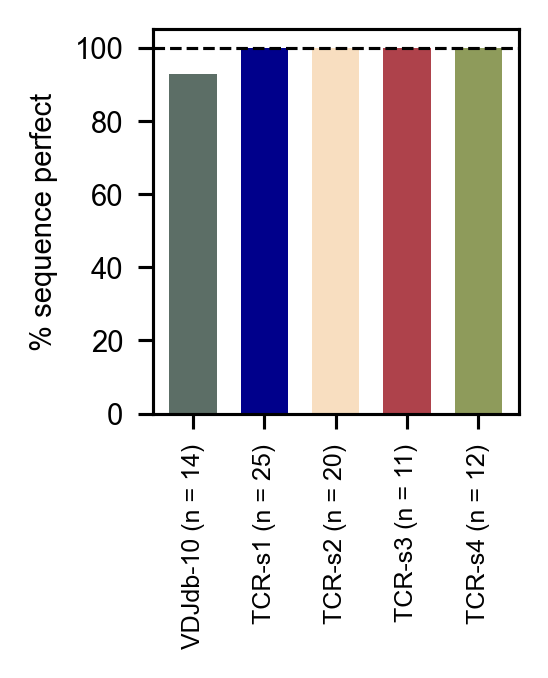

In [13]:
bar_space = 0.35
bar_width = 0.7
num_bars = len(libraries)

w = (num_bars * bar_width) + ((num_bars - 1) * bar_space)
x_pos_list = np.arange(num_bars) * (bar_width + bar_space)
ax,fig,gs = startfig(w, 6)

for x, lib in zip(x_pos_list, libraries):
    success_percent = sanger_df.loc[sanger_df.loc[:, 'Library'] == lib, 'Success'].sum()/sanger_df.loc[sanger_df.loc[:, 'Library'] == lib, 'Success'].shape[0] * 100
    ax.bar(x,
           success_percent,
           width = bar_width, color = color_dict[lib])

ax.axhline(100, linestyle='--', color='black', linewidth=0.75)
ax.set_xticks(x_pos_list)
ax.set_xticklabels([tcr_name_map[lib] + ' (n = ' + str(n_well_lib_map[lib]) + ')' for lib in libraries], fontsize = 6, rotation=90)
ax.tick_params(axis='y', labelsize=7)
ax.set_ylabel('% sequence perfect', fontsize=7)
#ax.set_title('Validation of bulk well TCR assembly product', fontsize = 8)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_2_pdfs/figure_2b_mini_sanger_succes_bar.pdf')

## Figure 2e

In [100]:
counts_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r3_2023-08-23_any_mers_full_seq_dataset_vdjdb_only/v6/sequencing_quality_analysis/outs/concatenated_barcode02_vdjdb_technical_duplicate_2/concatenated_barcode02_vdjdb_technical_duplicate_2_filtered_umi_count.csv')

In [101]:
counts_df.shape[0]/n_tcr_lib_map['Stapler_1']

0.9615488762523694

In [102]:
counts_df.shape[0]

3551

8.906664409770052
1.3585858908092325
6.115384615384615


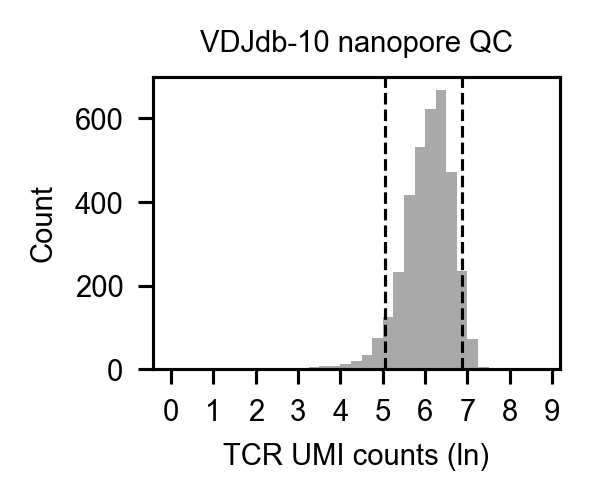

In [103]:
ax,fig,gs = startfig(5.25, 4.5)

print(counts_df.loc[:, 'log_transformed_count'].max())
ax.hist(counts_df.loc[:, 'log_transformed_count'], bins = np.arange(0, 9, 0.25), color = 'darkgrey')

print(counts_df.loc[:, 'log_transformed_count'].quantile(0.95)/counts_df.loc[:, 'log_transformed_count'].quantile(0.05))
print(counts_df.loc[:, 'Count'].quantile(0.95)/counts_df.loc[:, 'Count'].quantile(0.05))

ax.axvline(counts_df.loc[:, 'log_transformed_count'].quantile(0.05), linewidth = 0.75, color = 'black', linestyle = '--')
ax.axvline(counts_df.loc[:, 'log_transformed_count'].quantile(0.95), linewidth = 0.75, color = 'black', linestyle = '--')

ax.set_xticks(np.arange(0, 10, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Count', fontsize=7)
ax.set_title('VDJdb-10 nanopore QC', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_2_pdfs/stapler_deeper_plasmid_umi_counts_vdjdb.pdf')

## Figure S2D

In [104]:
counts_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r3_2023-08-23_any_mers_full_seq_dataset_vdjdb_only/v6/sequencing_quality_analysis/outs/concatenated_barcode01_vdjdb_technical_duplicate_1/concatenated_barcode01_vdjdb_technical_duplicate_1_filtered_umi_count.csv')

1.396868161362194
6.859375


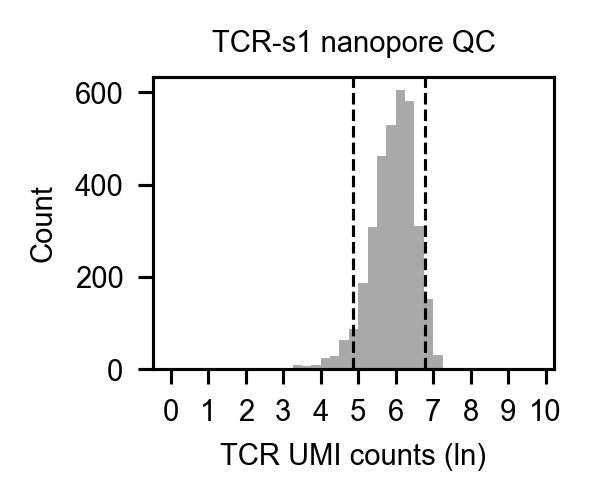

In [105]:
ax,fig,gs = startfig(5.25, 4.5)

ax.hist(counts_df.loc[:, 'log_transformed_count'], bins = np.arange(0, 10, 0.25), color = 'darkgrey')

print(counts_df.loc[:, 'log_transformed_count'].quantile(0.95)/counts_df.loc[:, 'log_transformed_count'].quantile(0.05))
print(counts_df.loc[:, 'Count'].quantile(0.95)/counts_df.loc[:, 'Count'].quantile(0.05))

ax.axvline(counts_df.loc[:, 'log_transformed_count'].quantile(0.05), linewidth = 0.75, color = 'black', linestyle = '--')
ax.axvline(counts_df.loc[:, 'log_transformed_count'].quantile(0.95), linewidth = 0.75, color = 'black', linestyle = '--')

ax.set_xticks(np.arange(0, 11, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Count', fontsize=7)
ax.set_title('TCR-s1 nanopore QC', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_2_pdfs/stapler_deeper_plasmid_umi_counts_duplicate_1_tcr_s1.pdf')

In [106]:
counts_df.shape[0]/n_tcr_lib_map['Stapler_2']*100

97.03703703703704

In [107]:
counts_df.shape[0]

3406

In [108]:
counts_df_a = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r7_ywe_t500_nsclc57_no3lam397_1st_ylq_gen/v1/sequencing_quality_analysis/outs/concatenated_barcode14_NSCLC57/concatenated_barcode14_NSCLC57_filtered_umi_count.csv', index_col = 0)

counts_df_b = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r7_ywe_t500_nsclc57_no3lam397_1st_ylq_gen/v1/sequencing_quality_analysis/outs/concatenated_barcode15_N03LAM397/concatenated_barcode15_N03LAM397_filtered_umi_count.csv', index_col = 0)

counts_df_c = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r7_ywe_t500_nsclc57_no3lam397_1st_ylq_gen/v1/sequencing_quality_analysis/outs/concatenated_barcode16_YWE/concatenated_barcode16_YWE_filtered_umi_count.csv', index_col = 0)

In [109]:
count_df_list = [counts_df_a, counts_df_b, counts_df_c]
merged_count_df = pd.concat([count_df for count_df in count_df_list])

1.3148733028218593
5.027251184834122


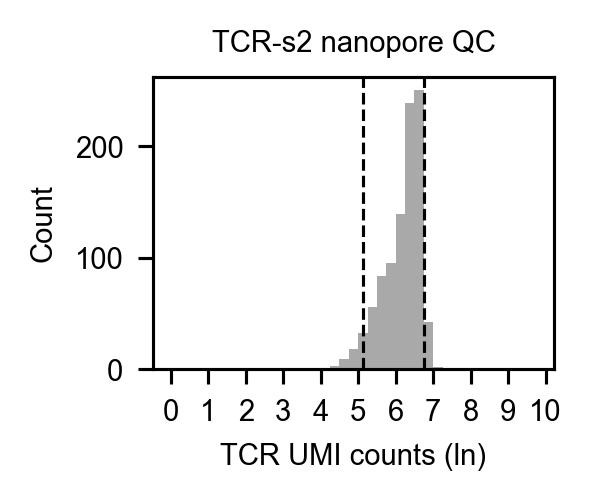

In [110]:
ax,fig,gs = startfig(5.25, 4.5)

ax.hist(merged_count_df.loc[:, 'log_transformed_count'], bins = np.arange(0, 10, 0.25), color = 'darkgrey')

print(merged_count_df.loc[:, 'log_transformed_count'].quantile(0.95)/merged_count_df.loc[:, 'log_transformed_count'].quantile(0.05))
print(merged_count_df.loc[:, 'Count'].quantile(0.95)/merged_count_df.loc[:, 'Count'].quantile(0.05))

ax.axvline(merged_count_df.loc[:, 'log_transformed_count'].quantile(0.05), linewidth = 0.75, color = 'black', linestyle = '--')
ax.axvline(merged_count_df.loc[:, 'log_transformed_count'].quantile(0.95), linewidth = 0.75, color = 'black', linestyle = '--')

ax.set_xticks(np.arange(0, 11, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Count', fontsize=7)
ax.set_title('TCR-s2 nanopore QC', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_2_pdfs/r7_tcr_s2.pdf')

In [111]:
# Sensitivity
merged_count_df.shape[0]/n_tcr_lib_map['R7']*100

98.57578840284842

In [112]:
merged_count_df.shape[0]

969

In [113]:
n_tcr_lib_map['R7']

983

In [114]:
# Precision
np.average([0.7262521796026872, 0.6421096364167171, 0.6823239050380004], weights = [393, 96, 494])*100

69.5958942796168

In [ ]:
counts_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r5_neo_MOF_MEL7_top1000/v1/sequencing_quality_analysis/outs/concatenated_barcode13_neo_MOF_MEL7/concatenated_barcode13_neo_MOF_MEL7_filtered_umi_count.csv')

In [ ]:
print(counts_df.shape[0])
print(counts_df.shape[0]/n_tcr_lib_map['Neo'])

968
0.968


6.481577129276431
1.1727886958051343
2.524682651622003


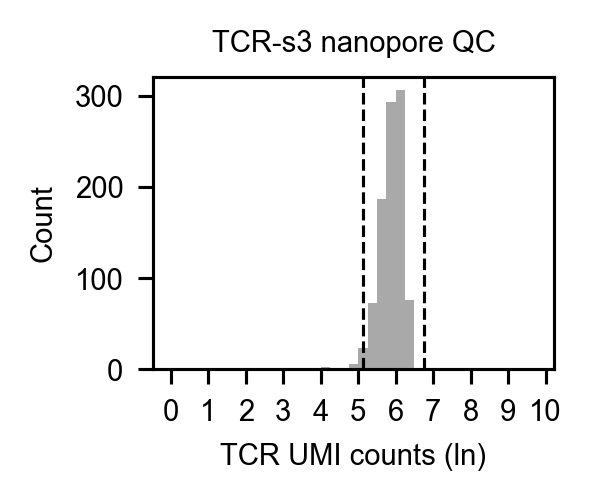

In [117]:
ax,fig,gs = startfig(5.25, 4.5)

print(counts_df.loc[:, 'log_transformed_count'].max())
ax.hist(counts_df.loc[:, 'log_transformed_count'], bins = np.arange(0, 10, 0.25), color = 'darkgrey')

print(counts_df.loc[:, 'log_transformed_count'].quantile(0.95)/counts_df.loc[:, 'log_transformed_count'].quantile(0.05))
print(counts_df.loc[:, 'Count'].quantile(0.95)/counts_df.loc[:, 'Count'].quantile(0.05))

ax.axvline(merged_count_df.loc[:, 'log_transformed_count'].quantile(0.05), linewidth = 0.75, color = 'black', linestyle = '--')
ax.axvline(merged_count_df.loc[:, 'log_transformed_count'].quantile(0.95), linewidth = 0.75, color = 'black', linestyle = '--')

ax.set_xticks(np.arange(0, 11, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Count', fontsize=7)
ax.set_title('TCR-s3 nanopore QC', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_2_pdfs/neo_top_1000_tcr_s3_plasmid_umi_counts.pdf')

In [118]:
counts_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r2_hc_cd4_tcr_assembly_run/v2/sequencing_quality_analysis/outs/concatenated_barcode24_HC/concatenated_barcode24_HC_filtered_umi_count.csv')

In [119]:
print(counts_df.shape[0])
print(counts_df.shape[0]/n_tcr_lib_map['hc_cd8']*100)

2811
97.19917012448133


In [120]:
n_tcr_lib_map['hc_cd8']

2892

9.555630757048275
1.2434621247266495
4.6


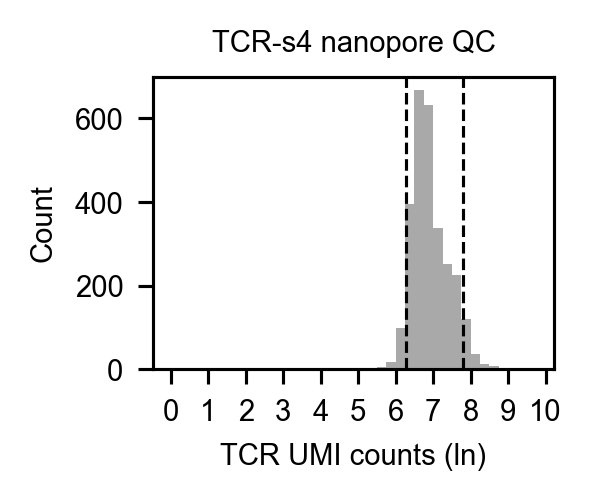

In [121]:
ax,fig,gs = startfig(5.25, 4.5)

print(counts_df.loc[:, 'log_transformed_count'].max())
ax.hist(counts_df.loc[:, 'log_transformed_count'], bins = np.arange(0, 10, 0.25), color = 'darkgrey')

print(counts_df.loc[:, 'log_transformed_count'].quantile(0.95)/counts_df.loc[:, 'log_transformed_count'].quantile(0.05))
print(counts_df.loc[:, 'Count'].quantile(0.95)/counts_df.loc[:, 'Count'].quantile(0.05))

ax.axvline(counts_df.loc[:, 'log_transformed_count'].quantile(0.05), linewidth = 0.75, color = 'black', linestyle = '--')
ax.axvline(counts_df.loc[:, 'log_transformed_count'].quantile(0.95), linewidth = 0.75, color = 'black', linestyle = '--')

ax.set_xticks(np.arange(0, 11, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Count', fontsize=7)
ax.set_title('TCR-s4 nanopore QC', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_2_pdfs/hc_treg_tcr_s4_umi_counts_hist.pdf')

In [ ]:
np.average([79.0, 76.7, 69.6, 63.8, 70.2],
           weights = [n_tcr_lib_map['Stapler_1'],
                      n_tcr_lib_map['Stapler_2'],
                      n_tcr_lib_map['R7'],
                      n_tcr_lib_map['Neo'],
                      n_tcr_lib_map['hc_cd8'],
                      ])

74.20096042391125

In [ ]:
x = np.array([79.0, 76.7, 69.6, 63.8, 70.2])
w = np.array([n_tcr_lib_map['Stapler_1'],
              n_tcr_lib_map['Stapler_2'],
              n_tcr_lib_map['R7'],
              n_tcr_lib_map['Neo'],
              n_tcr_lib_map['hc_cd8'],
              ])

weighted_mean = np.average(x, weights=w)

n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(x, size=len(x), p=w/np.sum(w))
    bootstrap_mean = np.average(bootstrap_sample, weights=w)
    bootstrap_means.append(bootstrap_mean)

bootstrap_means = np.array(bootstrap_means)
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])

weighted_mean = round(weighted_mean, 1)
ci_lower = round(ci_lower, 1)
ci_upper = round(ci_upper, 1)

print(f"Weighted Mean: {weighted_mean}")
print(f"95% Confidence Interval from Bootstrapping: ({ci_lower}, {ci_upper})")

Weighted Mean: 74.2
95% Confidence Interval from Bootstrapping: (69.1, 78.3)


In [ ]:
np.average([6.12, 6.85, 5.02, 2.52, 4.60],
           weights = [n_tcr_lib_map['Stapler_1'],
                      n_tcr_lib_map['Stapler_2'],
                      n_tcr_lib_map['R7'],
                      n_tcr_lib_map['Neo'],
                      n_tcr_lib_map['hc_cd8'],
                      ])

5.58060274879947

In [ ]:
x = np.array([96.2, 97.0, 98.6, 96.8, 97.2])
w = np.array([n_tcr_lib_map['Stapler_1'],
              n_tcr_lib_map['Stapler_2'],
              n_tcr_lib_map['R7'],
              n_tcr_lib_map['Neo'],
              n_tcr_lib_map['hc_cd8'],
              ])

weighted_mean = np.average(x, weights=w)

n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(x, size=len(x), p=w/np.sum(w))
    bootstrap_mean = np.average(bootstrap_sample, weights=w)
    bootstrap_means.append(bootstrap_mean)

bootstrap_means = np.array(bootstrap_means)
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])

weighted_mean = round(weighted_mean, 1)
ci_lower = round(ci_lower, 1)
ci_upper = round(ci_upper, 1)

print(f"Weighted Mean: {weighted_mean}")
print(f"95% Confidence Interval from Bootstrapping: ({ci_lower}, {ci_upper})")

Weighted Mean: 96.9
95% Confidence Interval from Bootstrapping: (96.4, 97.6)


## Figure 3b

In [236]:
counts_df_a = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_a_full/concatenated_barcode01_baseline_1/concatenated_barcode01_baseline_1_filtered_umi_count.csv', index_col = 0)

counts_df_b = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_b/concatenated_barcode02_baseline_b/concatenated_barcode02_baseline_b_filtered_umi_count.csv', index_col = 0)

counts_df_c = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_c/concatenated_barcode03_baseline_c/concatenated_barcode03_baseline_c_filtered_umi_count.csv', index_col = 0)

In [237]:
count_df_list = [counts_df_a, counts_df_b, counts_df_c]
suffix_list = ['_a', '_b', '_c']
count_df_list = [
    df.add_suffix(suffix).rename(columns={f"TCR{suffix}": "TCR"})
    for df, suffix in zip(count_df_list, suffix_list)
]
merged_count_df = reduce(lambda left, right: pd.merge(left, right, on="TCR", how="inner"), count_df_list)

In [238]:
'2_15_N24_156_GLCTLVAML' in merged_count_df.loc[:, 'TCR']

False

In [239]:
print(merged_count_df.shape[0])
print(merged_count_df.shape[0]/3693)

3478
0.941781749255348


6.953148392719538
2.0049932761809246
14.422999999999991


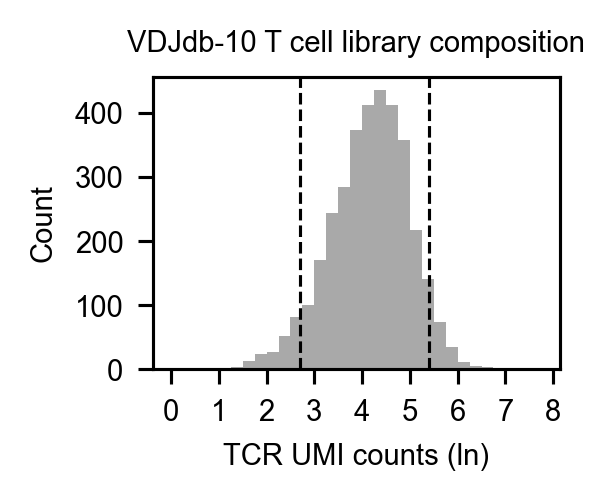

In [44]:
ax,fig,gs = startfig(5.25, 4.5)

print(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).max())
ax.hist(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.25), color = 'darkgrey')

print(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.95)/merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.05))
print(merged_count_df.loc[:, ['Count_a', 'Count_b', 'Count_c']].mean(1).quantile(0.95)/merged_count_df.loc[:, ['Count_a', 'Count_b', 'Count_c']].mean(1).quantile(0.05))

ax.axvline(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.05), linewidth = 0.75, color = 'black', linestyle = '--')
ax.axvline(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.95), linewidth = 0.75, color = 'black', linestyle = '--')

ax.set_xticks(np.arange(0, 9, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Count', fontsize=7)
ax.set_title('VDJdb-10 T cell library composition', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_3_pdfs/stapler_vdjdb_muTRBC_baseline_sort_umi_counts.pdf')

## Figure S2B and S2C

In [240]:
pval_threshold = 1e-5

In [4]:
ylq_deseq2_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/deseq2/ylq_glc_screen_results_deseq2_ylq_only.csv')

glc_deseq2_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/deseq2/ylq_glc_screen_results_deseq2_glc_only.csv')

ylq_deseq2_df.rename({'TCR': 'name'}, axis = 1, inplace = True)
glc_deseq2_df.rename({'TCR': 'name'}, axis = 1, inplace = True)

ylq_logfold_names = ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'log2FoldChange'] < 0, 'name'].values
glc_logfold_names = glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'log2FoldChange'] > 0, 'name'].values

In [75]:
ylq_deseq2_df

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1_5_G2_73_YLQPRTFLL,225.527142,-2.170264,0.165739,-12.491097,8.349389e-36,1.766772e-34
1,1_5_D23_142_YLQPRTFLL,101.433111,-1.721985,0.236559,-6.856592,7.052262e-12,7.926280e-11
2,1_5_H2_85_YLQPRTFLL,149.119764,-1.245115,0.179180,-6.390875,1.649397e-10,1.772455e-09
3,1_4_G23_178_YLQPRTFLL,49.221125,-1.605335,0.292824,-5.140756,2.736357e-07,2.584085e-06
4,1_5_E11_58_YLQPRTFLL,57.845920,-0.259861,0.261461,-0.611414,5.409256e-01,1.000000e+00
...,...,...,...,...,...,...,...
416,1_6_H19_186_YLQPRTFLL,76.811011,0.368257,0.224117,1.196954,2.313245e-01,7.036204e-01
417,1_5_E15_146_YLQPRTFLL,225.362663,-3.085420,0.191175,-15.616141,5.652501e-55,2.061359e-53
418,1_6_H13_180_YLQPRTFLL,10.421412,0.897974,0.652492,1.222963,2.213438e-01,6.829582e-01
419,1_6_G15_170_YLQPRTFLL,35.261375,0.514271,0.328302,1.261861,2.069986e-01,6.551874e-01


In [6]:
ylq_deseq2_df

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1_5_G2_73_YLQPRTFLL,225.527142,-2.170264,0.165739,-12.491097,8.349389e-36,1.766772e-34
1,1_5_D23_142_YLQPRTFLL,101.433111,-1.721985,0.236559,-6.856592,7.052262e-12,7.926280e-11
2,1_5_H2_85_YLQPRTFLL,149.119764,-1.245115,0.179180,-6.390875,1.649397e-10,1.772455e-09
3,1_4_G23_178_YLQPRTFLL,49.221125,-1.605335,0.292824,-5.140756,2.736357e-07,2.584085e-06
4,1_5_E11_58_YLQPRTFLL,57.845920,-0.259861,0.261461,-0.611414,5.409256e-01,1.000000e+00
...,...,...,...,...,...,...,...
416,1_6_H19_186_YLQPRTFLL,76.811011,0.368257,0.224117,1.196954,2.313245e-01,7.036204e-01
417,1_5_E15_146_YLQPRTFLL,225.362663,-3.085420,0.191175,-15.616141,5.652501e-55,2.061359e-53
418,1_6_H13_180_YLQPRTFLL,10.421412,0.897974,0.652492,1.222963,2.213438e-01,6.829582e-01
419,1_6_G15_170_YLQPRTFLL,35.261375,0.514271,0.328302,1.261861,2.069986e-01,6.551874e-01


In [7]:
glc_deseq2_df

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,2_16_H5_88_GLCTLVAML,11.103314,0.348069,0.617649,0.401634,6.879535e-01,1.000000e+00
1,2_16_C6_29_GLCTLVAML,785.509236,2.692614,0.099816,25.973915,9.763958e-149,3.347085e-146
2,2_16_G6_77_GLCTLVAML,146.742261,2.929262,0.232785,12.153946,5.466223e-34,1.046828e-32
3,2_15_E21_152_GLCTLVAML,83.043710,0.227336,0.224019,0.568417,5.697520e-01,1.000000e+00
4,2_16_D7_42_GLCTLVAML,84.680801,0.376176,0.216359,1.276470,2.017893e-01,6.446727e-01
...,...,...,...,...,...,...,...
188,2_15_F20_163_GLCTLVAML,26.363895,0.204649,0.376789,0.277738,7.812135e-01,1.000000e+00
189,2_16_E3_50_GLCTLVAML,235.687304,3.096162,0.186933,16.027997,8.146599e-58,3.405676e-56
190,2_16_A15_98_GLCTLVAML,59.144058,2.348577,0.287449,7.822536,5.176957e-15,6.383672e-14
191,2_16_C5_28_GLCTLVAML,602.956538,3.382250,0.126058,26.037581,1.859999e-149,7.084531e-147


In [242]:
ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'name'].isin(ylq_logfold_names) & (ylq_deseq2_df.loc[:, 'padj'] < pval_threshold), :].shape[0] / ylq_deseq2_df.shape[0]

0.40617577197149646

In [243]:
glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'name'].isin(glc_logfold_names) & (glc_deseq2_df.loc[:, 'padj'] < pval_threshold), :].shape[0] / glc_deseq2_df.shape[0]

0.694300518134715

In [244]:
np.average([ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'padj'] < pval_threshold, :].shape[0] / ylq_deseq2_df.shape[0], glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'padj'] < pval_threshold, :].shape[0] / glc_deseq2_df.shape[0]], weights =  [ylq_deseq2_df.shape[0], glc_deseq2_df.shape[0]])

0.498371335504886

In [245]:
print(ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'name'].isin(ylq_logfold_names) & (ylq_deseq2_df.loc[:, 'padj'] < pval_threshold), :].shape[0])
print(ylq_deseq2_df.shape[0])

171
421


In [246]:
print(glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'name'].isin(glc_logfold_names) & (glc_deseq2_df.loc[:, 'padj'] < pval_threshold), :].shape[0])
print(glc_deseq2_df.shape[0])

134
193


6.953148392719538
2.0049932761809246


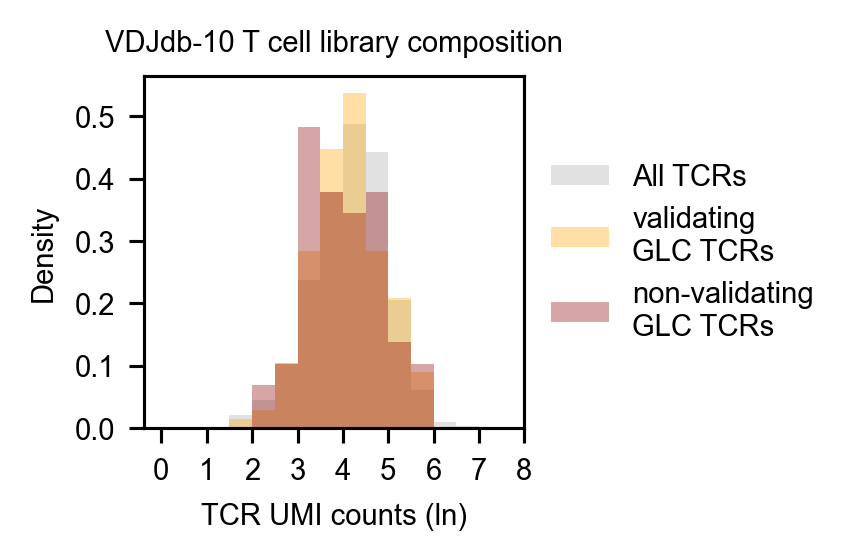

In [254]:
ax,fig,gs = startfig(7.5, 5)

print(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).max())
ax.hist(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.5), color = 'darkgrey', density = True, alpha = 0.35, label = 'All TCRs')

ax.hist(merged_count_df.loc[merged_count_df.loc[:, 'TCR'].isin(glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'name'].isin(glc_logfold_names) & (glc_deseq2_df.loc[:, 'padj'] < pval_threshold), 'name'].values), ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.5), color = 'orange', density = True, alpha = 0.35,  label = 'validating\nGLC TCRs')

ax.hist(merged_count_df.loc[merged_count_df.loc[:, 'TCR'].isin(glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'padj'] > pval_threshold, 'name'].values), ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.5), color = 'darkred', density = True, alpha = 0.35, label = 'non-validating\nGLC TCRs')

print(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.95)/merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.05))

ax.legend(fontsize = 7, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(np.arange(0, 9, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Density', fontsize=7)
ax.set_title('VDJdb-10 T cell library composition', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_3_pdfs/stapler_vdjdb_muTRBC_baseline_sort_umi_counts_colored_by_glc_validating.pdf')

6.953148392719538
2.0049932761809246


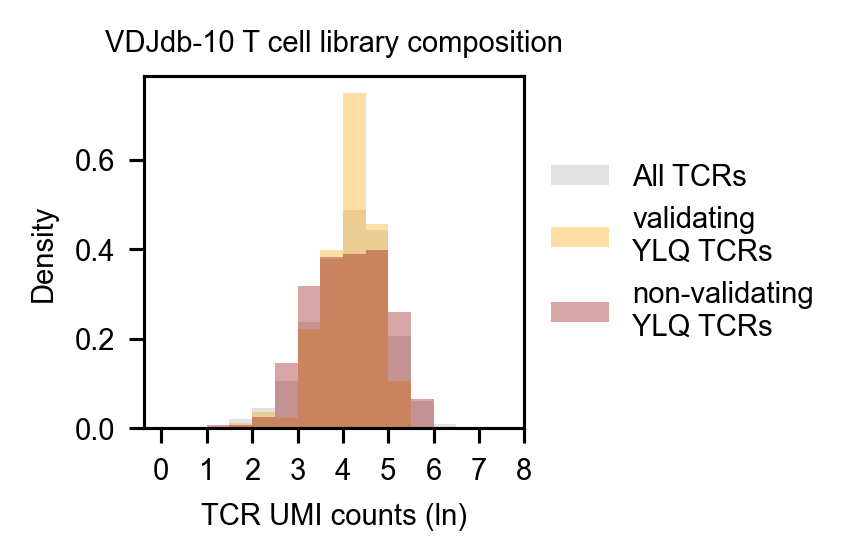

In [255]:
ax,fig,gs = startfig(7.5, 5)

print(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).max())
ax.hist(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.5), color = 'darkgrey', density = True, alpha = 0.35, label = 'All TCRs')

ax.hist(merged_count_df.loc[merged_count_df.loc[:, 'TCR'].isin(ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'name'].isin(ylq_logfold_names) & (ylq_deseq2_df.loc[:, 'padj'] < pval_threshold), 'name'].values), ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.5), color = 'orange', density = True, alpha = 0.35,  label = 'validating\nYLQ TCRs')

ax.hist(merged_count_df.loc[merged_count_df.loc[:, 'TCR'].isin(ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'padj'] > pval_threshold, 'name'].values), ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1), bins = np.arange(0, 8, 0.5), color = 'darkred', density = True, alpha = 0.35, label = 'non-validating\nYLQ TCRs')

print(merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.95)/merged_count_df.loc[:, ['log_transformed_count_a', 'log_transformed_count_b', 'log_transformed_count_c']].mean(1).quantile(0.05))

ax.legend(fontsize = 7, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(np.arange(0, 9, 1))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('TCR UMI counts (ln)', fontsize=7)
ax.set_ylabel('Density', fontsize=7)
ax.set_title('VDJdb-10 T cell library composition', fontsize = 7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_3_pdfs/stapler_vdjdb_muTRBC_baseline_sort_umi_counts_colored_by_ylq_validating.pdf')

## Figures 3D, 3E, 3F, S3F

In [49]:
drop_cols = ['cdr3fix.alpha', 'cdr3fix.beta']
vdjdb_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/vdjdb_docker/vdjdb-2023-05-19/vdjdb_full.txt', sep = '\t', header = 0, low_memory=False)
vdjdb_df.drop(drop_cols, axis=1, inplace = True)
vdjdb_df = vdjdb_df.loc[vdjdb_df.loc[:, 'reference.id'] != 'https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', :].copy()
vdjdb_df.dropna(subset = ['cdr3.alpha', 'v.alpha', 'j.alpha', 'cdr3.beta', 'v.beta', 'j.beta'], axis = 0, inplace = True)

In [17]:
vdjdb_df.loc[(vdjdb_df.loc[:, 'mhc.class'] == 'MHCI') & (vdjdb_df.loc[:, 'species'] == 'HomoSapiens'), 'antigen.species'].value_counts(normalize = True)

SARS-CoV-2                 0.479809
InfluenzaA                 0.138390
HCV                        0.111469
CMV                        0.098990
HomoSapiens                0.057628
EBV                        0.054683
YFV                        0.034633
HIV-1                      0.006870
synthetic                  0.004767
HSV-2                      0.004206
HCoV-HKU1                  0.003365
HTLV-1                     0.001823
MCPyV                      0.000841
DENV3/4                    0.000561
DENV1                      0.000561
M.tuberculosis             0.000561
HIV1                       0.000280
Homo sapiens               0.000280
HPV-16                     0.000140
SaccharomycesCerevisiae    0.000140
Name: antigen.species, dtype: float64

In [18]:
vdjdb_df.loc[vdjdb_df.loc[:, 'antigen.epitope'].isin(['YLQPRTFLL', 'GLCTLVAML']) & (vdjdb_df.loc[:, 'vdjdb.score'] == 3)]

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.subject.cohort,meta.subject.id,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,vdjdb.score
53480,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,"EBV-seropositive,healthy",G6,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3
56280,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3
56470,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3
56471,CVVNRNNDMRF,TRAV12-1*01,TRAJ43*01,CAGQVTNTGELFF,TRBV19*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7n6e,3
56484,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3


In [19]:
0.479809+0.138390+0.111469+0.098990+0.054683+0.034633+0.006870+0.004206+0.003365+0.001823+0.000841+0.000561+0.000561+0.000280+0.000140

0.9366210000000001

In [20]:
vdjdb_df.loc[(vdjdb_df.loc[:, 'mhc.class'] == 'MHCI') & (vdjdb_df.loc[:, 'species'] == 'HomoSapiens'), 'vdjdb.score'].value_counts(normalize = True) * 100

0    77.145261
1     8.496915
3     8.384745
2     5.973079
Name: vdjdb.score, dtype: float64

In [52]:
epitope_ranked_list = vdjdb_df.loc[(vdjdb_df.loc[:, 'mhc.class'] == 'MHCI') & (vdjdb_df.loc[:, 'species'] == 'HomoSapiens'), 'antigen.epitope'].value_counts(normalize = True).index.tolist()

In [22]:
0.117919+0.081043+0.066181+0.059871+0.055945+0.035754+0.034633+0.034352+0.018929+0.018648

0.523275

In [23]:
vdjdb_df.loc[(vdjdb_df.loc[:, 'mhc.class'] == 'MHCI') & (vdjdb_df.loc[:, 'species'] == 'HomoSapiens'), 'antigen.epitope'].shape[0]

7132

In [62]:
7132*0.52

3708.6400000000003

In [63]:
763/(7132+763)*100

9.664344521849271

In [24]:
vdjdb_df = vdjdb_df.loc[vdjdb_df.loc[:, 'antigen.epitope'].isin(['YLQPRTFLL', 'GLCTLVAML']), :].copy()
vdjdb_df.reset_index(drop = True, inplace = True)

In [25]:
vdjdb_df.loc[vdjdb_df.loc[:, 'antigen.epitope'].isin(['YLQPRTFLL', 'GLCTLVAML']) & (vdjdb_df.loc[:, 'vdjdb.score'] == 3)]

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.subject.cohort,meta.subject.id,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,vdjdb.score
388,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,"EBV-seropositive,healthy",G6,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3
452,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3
453,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3
454,CVVNRNNDMRF,TRAV12-1*01,TRAJ43*01,CAGQVTNTGELFF,TRBV19*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7n6e,3
455,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3


In [26]:
vdjdb_df.loc[:, 'clonotype_aa'] = (vdjdb_df.loc[:, 'v.alpha'].str.split('*').str[0] + '_' +
                                   vdjdb_df.loc[:, 'cdr3.alpha'].str.split('*').str[0] + '_' +
                                   vdjdb_df.loc[:, 'j.alpha'].str.split('*').str[0] + '--' +
                                   vdjdb_df.loc[:, 'v.beta'].str.split('*').str[0] + '_' +
                                   vdjdb_df.loc[:, 'cdr3.beta'].str.split('*').str[0] + '_' +
                                   vdjdb_df.loc[:, 'j.beta'].str.split('*').str[0]
                                   )

In [8]:
tcr_refs_df = pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r3_2023-08-23_any_mers_full_seq_dataset_vdjdb_only/v6/sequencing_quality_analysis/references/tcr_refs_df.csv')

In [9]:
tcr_refs_df.loc[:, 'clonotype_aa'] = (tcr_refs_df.loc[:, 'TRAV'].str.split('*').str[0] + '_' +
                                      tcr_refs_df.loc[:, 'cdr3_alpha_aa'].str.split('*').str[0] + '_' +
                                      tcr_refs_df.loc[:, 'TRAJ'].str.split('*').str[0] + '--' +
                                      tcr_refs_df.loc[:, 'TRBV'].str.split('*').str[0] + '_' +
                                      tcr_refs_df.loc[:, 'cdr3_beta_aa'].str.split('*').str[0] + '_' +
                                      tcr_refs_df.loc[:, 'TRBJ'].str.split('*').str[0]
                                      )

In [29]:
print(vdjdb_df.shape[0])
vdjdb_merge_df = pd.merge(vdjdb_df, tcr_refs_df.loc[:, ['clonotype_aa', 'name']], on = 'clonotype_aa', how = 'inner')
print(vdjdb_merge_df.shape[0])

727
1368


In [30]:
vdjdb_merge_df.loc[vdjdb_merge_df.loc[:, 'vdjdb.score'] == 3]

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,vdjdb.score,clonotype_aa,name
152,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3,TRAV5_CAEDNNARLMF_TRAJ31--TRBV20-1_CSARDGTGNGY...,2_16_G10_81_GLCTLVAML
153,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3,TRAV5_CAEDNNARLMF_TRAJ31--TRBV20-1_CSARDGTGNGY...,2_16_J3_81_GLCTLVAML
702,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_D20_139_GLCTLVAML
703,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_F13_156_GLCTLVAML
704,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_L17_139_GLCTLVAML
705,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_N24_156_GLCTLVAML
806,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
807,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_P3_9_YLQPRTFLL
808,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
809,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_P3_9_YLQPRTFLL


In [31]:
print(vdjdb_merge_df.shape[0])
vdjdb_merge_df.drop_duplicates(['clonotype_aa', 'name', 'method.identification', 'reference.id', 'method.sequencing', 'method.singlecell', 'vdjdb.score'], inplace = True)
print(vdjdb_merge_df.shape[0])

1368
1320


In [32]:
vdjdb_merge_df.loc[vdjdb_merge_df.loc[:, 'vdjdb.score'] == 3]

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,vdjdb.score,clonotype_aa,name
152,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3,TRAV5_CAEDNNARLMF_TRAJ31--TRBV20-1_CSARDGTGNGY...,2_16_G10_81_GLCTLVAML
153,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3,TRAV5_CAEDNNARLMF_TRAJ31--TRBV20-1_CSARDGTGNGY...,2_16_J3_81_GLCTLVAML
702,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_D20_139_GLCTLVAML
703,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_F13_156_GLCTLVAML
704,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_L17_139_GLCTLVAML
705,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_N24_156_GLCTLVAML
806,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
807,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_P3_9_YLQPRTFLL
808,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
809,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_P3_9_YLQPRTFLL


In [33]:
reference_id_map = {
    'https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#': '10x',
    'https://github.com/antigenomics/vdjdb-db/issues/326': 'PMID:35383307',
    'https://doi.org/10.1016/j.xcrm.2023.101017': 'PMID:37030296'
}


vdjdb_merge_df.loc[:, 'reference.id'] = vdjdb_merge_df.loc[:, 'reference.id'].map(reference_id_map).fillna(vdjdb_merge_df['reference.id'])
print(vdjdb_merge_df.loc[:, 'reference.id'].unique())

['PMID:33664060' 'PMID:35750048' 'PMID:36711524' 'PMID:28636592'
 'PMID:21124993' 'PMID:27645996' 'PMID:34793243' 'PMID:35383307'
 'PMID:37030296' 'PMID:34811538' 'PMID:35525797' 'PMID:28636589'
 'PMID:33951417' 'https://github.com/antigenomics/vdjdb-db/issues/215'
 'PMID:34685626' 'PMID:11046006']


In [34]:
vdjdb_merge_df.loc[vdjdb_merge_df.loc[:, 'vdjdb.score'] == 3]

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,vdjdb.score,clonotype_aa,name
152,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3,TRAV5_CAEDNNARLMF_TRAJ31--TRBV20-1_CSARDGTGNGY...,2_16_G10_81_GLCTLVAML
153,CAEDNNARLMF,TRAV5*01,TRAJ31*01,CSARDGTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,3o4l,3,TRAV5_CAEDNNARLMF_TRAJ31--TRBV20-1_CSARDGTGNGY...,2_16_J3_81_GLCTLVAML
702,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_D20_139_GLCTLVAML
703,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_F13_156_GLCTLVAML
704,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_L17_139_GLCTLVAML
705,CAESTGKLIF,TRAV5*01,TRAJ37*01,CSVGTGGTNEKLFF,TRBV29-1*01,NaN,TRBJ1-4*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,GLC1B11,GLC,"stem-cell-graft,TCL",HLA-A*02:01,NaN,NaN,3,TRAV5_CAESTGKLIF_TRAJ37--TRBV29-1_CSVGTGGTNEKL...,2_15_N24_156_GLCTLVAML
806,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
807,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_P3_9_YLQPRTFLL
808,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
809,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_P3_9_YLQPRTFLL


In [35]:
print(vdjdb_merge_df.shape[0])

1320


In [36]:
print(ylq_deseq2_df.shape[0])
print(glc_deseq2_df.shape[0])

421
193


In [37]:
vdjdb_merge_df.loc[vdjdb_merge_df.loc[:, 'name'] == '1_7_A10_9_YLQPRTFLL', :]

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,vdjdb.score,clonotype_aa,name
802,CAVNRDDKIIF,TRAV12-2,TRAJ30,CASSPDIEQYF,TRBV7-9,NaN,TRBJ2-7,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,S269,PBMC,NaN,NaN,NaN,1,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
806,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01:48,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7n1f,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
808,CAVNRDDKIIF,TRAV12-2*01,TRAJ30*01,CASSPDIEQYF,TRBV7-9*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,7rtr,3,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL
810,CAVNRDDKIIF,TRAV12-2,TRAJ30,CASSPDIEQYF,TRBV7-9,NaN,TRBJ2-7,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,PBMC,NaN,NaN,NaN,1,TRAV12-2_CAVNRDDKIIF_TRAJ30--TRBV7-9_CASSPDIEQ...,1_7_A10_9_YLQPRTFLL


In [38]:
vdjdb_merge_df_ylq = pd.merge(vdjdb_merge_df, ylq_deseq2_df.loc[:,['name', 'padj', 'log2FoldChange']], on = 'name', how = 'inner')
print(vdjdb_merge_df_ylq.shape[0])
vdjdb_merge_df_glc = pd.merge(vdjdb_merge_df, glc_deseq2_df.loc[:,['name', 'padj', 'log2FoldChange']], on = 'name', how = 'inner')
print(vdjdb_merge_df_glc.shape[0])

print(vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'meta.structure.id'] == '7rtr', 'reference.id'])
vdjdb_merge_df_ylq = vdjdb_merge_df_ylq.sort_values('vdjdb.score', ascending=False).drop_duplicates('name', keep='first')
print(vdjdb_merge_df_ylq.shape[0])
vdjdb_merge_df_glc = vdjdb_merge_df_glc.sort_values('vdjdb.score', ascending=False).drop_duplicates('name', keep='first')
print(vdjdb_merge_df_glc.shape[0])

# We cannot assign 7rtr because it is a duplicate clonotype of 7n1f
# vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'meta.structure.id'] == '7rtr', 'reference.id']  = 'PMID:34685626'
vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'meta.structure.id'] == '7n6e', 'reference.id']  = 'PMID:34384783'
vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'meta.structure.id'] == '7n1f', 'reference.id']  = 'PMID:35013235'

fraction_validating_df_ylq = vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'name'].isin(ylq_logfold_names), :].groupby(['reference.id'])['padj'].apply(lambda x: (x < pval_threshold).mean()).reset_index().sort_values('padj', ascending = True).rename({'reference.id': 'study', 'padj': 'fraction_validating'}, axis = 1)

fraction_validating_df_glc = vdjdb_merge_df_glc.loc[vdjdb_merge_df_glc.loc[:, 'name'].isin(glc_logfold_names), :].groupby(['reference.id'])['padj'].apply(lambda x: (x < pval_threshold).mean()).reset_index().sort_values('padj', ascending = True).rename({'reference.id': 'study', 'padj': 'fraction_validating'}, axis = 1)

428
204
254    PMID:34685626
Name: reference.id, dtype: object
421
193


In [39]:
vdjdb_merge_df_ylq.loc[:, 'vdjdb.score'].value_counts()

0    369
1     49
3      2
2      1
Name: vdjdb.score, dtype: int64

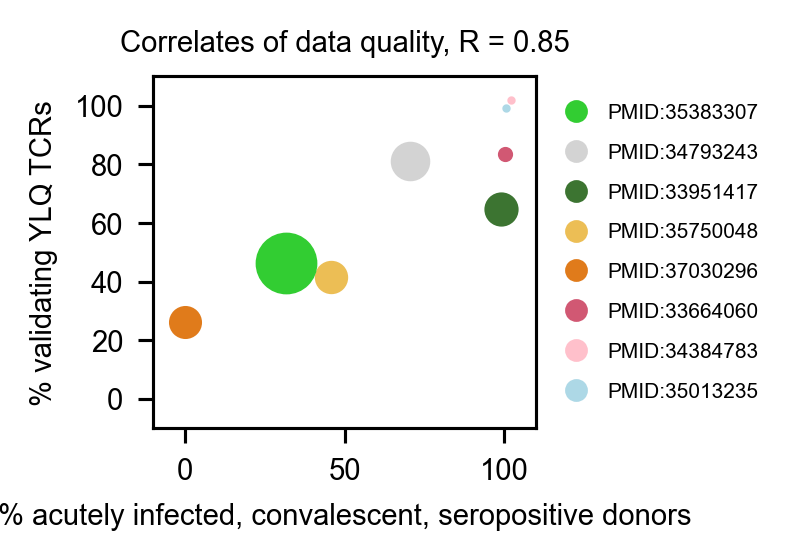

In [103]:
ylq_study_df = pd.read_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_3_pdfs/study_contribution_to_ylq_validating_fraction.xlsx')

ylq_study_df = pd.merge(ylq_study_df, fraction_validating_df_ylq, on = 'study', how = 'inner')

color_list = ['pink', 'limegreen', '#F8DEC0', '#AE424B', 'lightgrey', '#8E9B5B', 'darkblue', '#E07B1B', '#3C7431', '#6062A5', 'darkgrey', '#D15873', '#ECBE55', '#826838', 'lightblue', '#5C6E66']
study_color_dict = dict(zip(list(set(np.concatenate([
    ylq_study_df.loc[:, 'study'].unique(),
    vdjdb_merge_df_glc.loc[:, 'reference.id'].unique()
]))), color_list))

ax, fig, gs = startfig(7, 5)
scatter_points = []

for study in ylq_study_df['study'].unique():
    size = vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'reference.id'] == study, :].shape[0]

    jitter_max = 2
    std_dev = jitter_max / 2
    jitter_x = np.random.normal(0, std_dev, size=1)
    jitter_y = np.random.normal(0, std_dev, size=1)

    sc = ax.scatter(
        ylq_study_df.loc[ylq_study_df.loc[:, 'study'] == study, '% donors convalescent/acute/seropositive'] + jitter_x,
        ylq_study_df.loc[ylq_study_df.loc[:, 'study'] == study, 'fraction_validating'] * 100 + jitter_y,
        label=study,
        color = study_color_dict[study],
        s=size
    )

    scatter_points.append((study, sc, size))

scatter_points.sort(key=lambda x: x[2], reverse=True)

fixed_size = 20  # Adjust as needed
handles = [plt.Line2D([], [], marker='o', linestyle='', markersize=np.sqrt(fixed_size), color=sc.get_facecolor()[0]) for _, sc, _ in scatter_points]
labels = [sp[0] for sp in scatter_points]

ax.legend(handles, labels, fontsize=5, loc='center left', bbox_to_anchor=(1, 0.5),
          handletextpad=0.5, labelspacing=1)  # Adjust spacing

ax.set_ylim(-10, 110)
ax.set_xlim(-10, 110)
ax.set_xlabel('% acutely infected, convalescent, seropositive donors', fontsize=7)
ax.set_ylabel('% validating YLQ TCRs', fontsize=7)

spearmanr = round(sp.stats.spearmanr(ylq_study_df['% donors convalescent/acute/seropositive'], ylq_study_df['fraction_validating'])[0], 2)
ax.set_title('Correlates of data quality, R = ' + str(spearmanr), fontsize=7)

ax.tick_params(axis='both', labelsize=7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_3_pdfs/percent_sick_vs_study_contribution_to_validating_vs_non_validating_ylq_scatter.pdf')

In [71]:
vdjdb_score_ylq_df = vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'name'].isin(ylq_logfold_names), :].groupby(['vdjdb.score'])['padj'].apply(lambda x: (x < pval_threshold).mean()).reset_index().sort_values('padj', ascending = True).rename({'padj': 'fraction_validating'}, axis = 1)
vdjdb_score_glc_df = vdjdb_merge_df_glc.loc[vdjdb_merge_df_glc.loc[:, 'name'].isin(glc_logfold_names), :].groupby(['vdjdb.score'])['padj'].apply(lambda x: (x < pval_threshold).mean()).reset_index().sort_values('padj', ascending = True).rename({'padj': 'fraction_validating'}, axis = 1)

# Total number of true positives
total_tp_ylq = (vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'name'].isin(ylq_logfold_names), 'padj'] < pval_threshold).sum()
total_tp_glc = (vdjdb_merge_df_glc.loc[vdjdb_merge_df_glc.loc[:, 'name'].isin(glc_logfold_names), 'padj'] < pval_threshold).sum()

# Group by score and compute TP counts
sensitivity_ylq = vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq.loc[:, 'name'].isin(ylq_logfold_names), :].groupby('vdjdb.score')['padj'].apply(lambda x: (x < pval_threshold).sum()).reset_index(name='tp_count')
sensitivity_glc = vdjdb_merge_df_glc.loc[vdjdb_merge_df_glc.loc[:, 'name'].isin(glc_logfold_names), :].groupby('vdjdb.score')['padj'].apply(lambda x: (x < pval_threshold).sum()).reset_index(name='tp_count')

# Compute sensitivity
sensitivity_ylq.loc[:, 'sensitivity'] = sensitivity_ylq.loc[:, 'tp_count'] / total_tp_ylq
sensitivity_glc.loc[:, 'sensitivity'] = sensitivity_glc.loc[:, 'tp_count'] / total_tp_glc

sensitivity_merged_df = (sensitivity_ylq.loc[:, 'tp_count'] + sensitivity_glc.loc[:, 'tp_count']) / (total_tp_ylq + total_tp_glc)

In [47]:
# Label true positives
df_ylq = vdjdb_merge_df_ylq.loc[vdjdb_merge_df_ylq['name'].isin(ylq_logfold_names)].copy()
df_ylq['is_tp'] = df_ylq['padj'] < pval_threshold

df_glc = vdjdb_merge_df_glc.loc[vdjdb_merge_df_glc['name'].isin(glc_logfold_names)].copy()
df_glc['is_tp'] = df_glc['padj'] < pval_threshold

# Total true positives
total_tp_ylq = df_ylq['is_tp'].sum()
total_tp_glc = df_glc['is_tp'].sum()

# Group by score and count TPs
grouped_ylq = df_ylq.groupby('vdjdb.score')['is_tp'].sum().reset_index(name='tp_count')
grouped_glc = df_glc.groupby('vdjdb.score')['is_tp'].sum().reset_index(name='tp_count')

# Sort descending and compute cumulative sensitivity
grouped_ylq = grouped_ylq.sort_values('vdjdb.score', ascending=False)
grouped_ylq['cumulative_tp'] = grouped_ylq['tp_count'].cumsum()
grouped_ylq['sensitivity'] = grouped_ylq['cumulative_tp'] / total_tp_ylq

grouped_glc = grouped_glc.sort_values('vdjdb.score', ascending=False)
grouped_glc['cumulative_tp'] = grouped_glc['tp_count'].cumsum()
grouped_glc['sensitivity'] = grouped_glc['cumulative_tp'] / total_tp_glc

# Optional: Merge YLQ and GLC for combined sensitivity
merged = pd.merge(grouped_ylq[['vdjdb.score', 'cumulative_tp']],
                  grouped_glc[['vdjdb.score', 'cumulative_tp']],
                  on='vdjdb.score', how='outer', suffixes=('_ylq', '_glc')).fillna(0)

merged = merged.sort_values('vdjdb.score', ascending=True)
merged['combined_sensitivity'] = (merged['cumulative_tp_ylq'] + merged['cumulative_tp_glc']) / (total_tp_ylq + total_tp_glc)

In [54]:
merged

,vdjdb.score,cumulative_tp_ylq,cumulative_tp_glc,combined_sensitivity
3,0,171,134,1.000000
2,1,8,40,0.157377
1,2,3,12,0.049180
0,3,2,2,0.013115


In [65]:
x_pos_list

array([0.  , 1.05, 2.1 , 3.15])

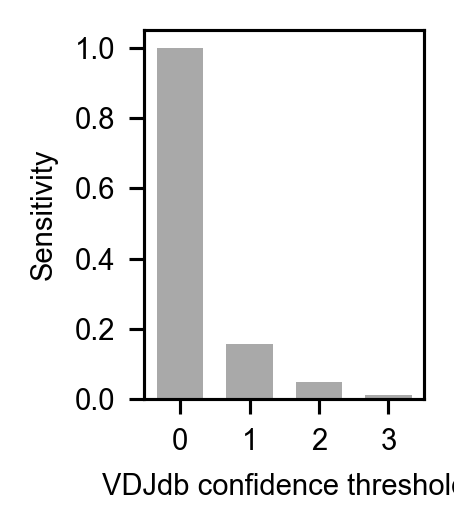

In [89]:
bar_space = 0.35
bar_width = 0.7
num_bars = len(merged.loc[:, 'vdjdb.score'].unique())

w = (num_bars * bar_width) + ((num_bars - 1) * bar_space) + 0.25
x_pos_list = np.arange(num_bars) * (bar_width + bar_space)
ax,fig,gs = startfig(w, 4)

ax.bar(x_pos_list,
       merged.loc[:, 'combined_sensitivity'],
       width = bar_width,
       color = 'darkgrey')
ax.set_xticks(x_pos_list)  # Set the positions of ticks
ax.set_xticklabels(merged.loc[:, 'vdjdb.score'], fontsize=7)
ax.set_xlabel('VDJdb confidence threshold', fontsize = 7)
ax.set_ylabel('Sensitivity', fontsize = 7)
ax.tick_params(axis='both', labelsize=7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_3_pdfs/percent_validating_vs_vdjdb_confidence_score_sensitivity.pdf')

In [84]:
len('IQNPEPAVYQLKDPRSQDSTLCLFTDFDSQINVPKTMESGTFITDKCVLDMKAMDSKSNGAIAWSNQTSFTCQDIFKETNATYPSSDVPCDATLTEKSFETDMNLNFQNLSVMGLRILLLKVAGFNLLMTLRLWSS')*3

408

In [80]:
number_tcr_list

[512, 84, 14, 4]

In [82]:
vdjdb_merge_df_ylq.loc[:, 'vdjdb.score'].value_counts().sum()

421

In [83]:
vdjdb_merge_df_glc.loc[:, 'vdjdb.score'].value_counts().sum()

193

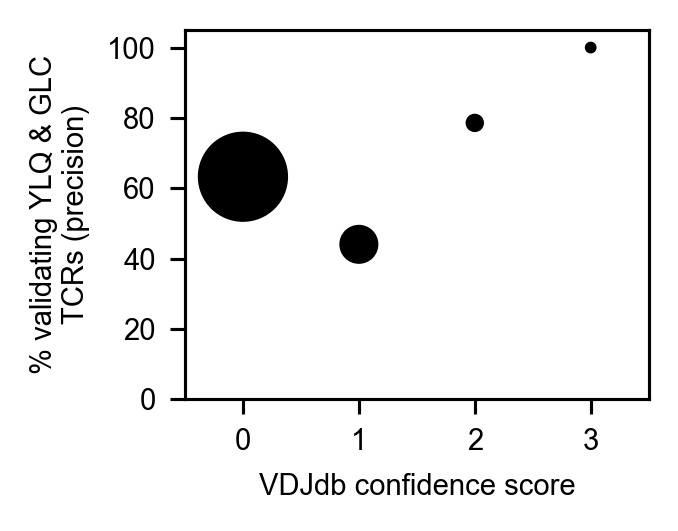

In [235]:
ax,fig,gs = startfig(6, 4.75)

x = np.arange(0, 4)

mean_validating_percentage_list = []
number_tcr_list = []
for i in x:
    number_tcr_list.append(vdjdb_merge_df_ylq.loc[:, 'vdjdb.score'].value_counts()[i] + vdjdb_merge_df_glc.loc[:, 'vdjdb.score'].value_counts()[i] )
    mean_validating_percentage_list.append(np.average([vdjdb_score_ylq_df.loc[:, 'fraction_validating'][i],
                                                       vdjdb_score_glc_df.loc[:, 'fraction_validating'][i]],
                                                      weights = [vdjdb_merge_df_ylq.loc[:, 'vdjdb.score'].value_counts()[i],
                                                                 vdjdb_merge_df_glc.loc[:, 'vdjdb.score'].value_counts()[i]]))

ax.scatter(x, [sensitivity*100 for sensitivity in mean_validating_percentage_list],
           s = [number/1.2 for number in number_tcr_list], color = 'black')

ax.set_ylim(0, 105)
ax.set_xlim(-0.5, 3.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_ylabel('% validating YLQ & GLC\nTCRs (precision)', fontsize=7)
ax.set_xlabel('VDJdb confidence score', fontsize=7)
ax.tick_params(axis='both', labelsize=7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_3_pdfs/percent_validating_vs_vdjdb_confidence_score_precision.pdf')

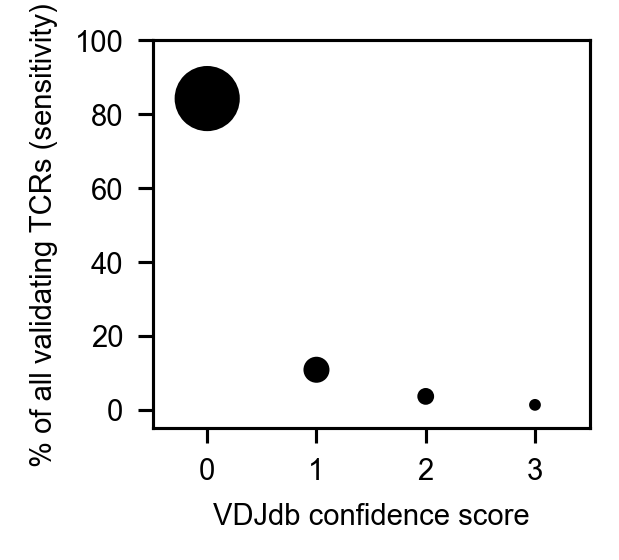

In [104]:
ax,fig,gs = startfig(5.5, 5)

x = np.arange(0, 4)

ax.scatter(x, [mean_fraction*100 for mean_fraction in sensitivity_merged_df],
           s = [number/1.2 for number in (sensitivity_ylq.loc[:, 'tp_count'] + sensitivity_glc.loc[:, 'tp_count'])], color = 'black')

ax.set_ylim(-5, 100)
ax.set_xlim(-0.5, 3.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_ylabel('% of all validating TCRs (sensitivity)', fontsize=7)
ax.set_xlabel('VDJdb confidence score', fontsize=7)
ax.tick_params(axis='both', labelsize=7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_3_pdfs/percent_validating_vs_vdjdb_confidence_score_sensitivity.pdf')

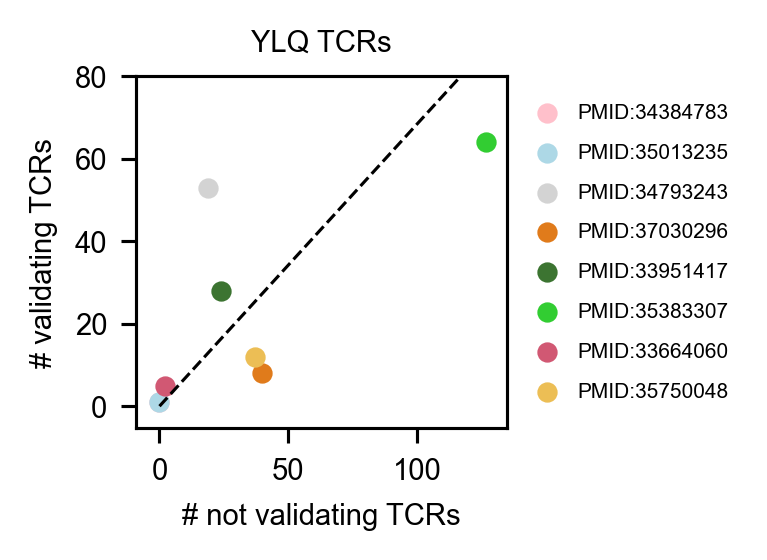

In [84]:
ax,fig,gs = startfig(6.75, 5)

studies = vdjdb_merge_df_ylq.loc[:, 'reference.id'].unique()

for study in studies:
    ax.scatter(vdjdb_merge_df_ylq.loc[(vdjdb_merge_df_ylq.loc[:, 'reference.id'] == study) & (vdjdb_merge_df_ylq.loc[:, 'padj'] > pval_threshold), :].shape[0],
               vdjdb_merge_df_ylq.loc[(vdjdb_merge_df_ylq.loc[:, 'reference.id'] == study) & (vdjdb_merge_df_ylq.loc[:, 'padj'] < pval_threshold), :].shape[0], label = study, s = 15,
               color = study_color_dict[study]
               )

ax.plot(171/(421-171)*np.arange(0, 135), color = 'black', linestyle = '--', linewidth = 0.75)

ax.legend(fontsize=5, loc='center left', bbox_to_anchor=(1, 0.5),
          handletextpad=0.5, labelspacing=1)
ax.set_ylim(-(80/15), 80)
ax.set_xlim(-(135/15), 135)
ax.set_title('YLQ TCRs', fontsize = 7)
ax.set_ylabel('# validating TCRs', fontsize =7)
ax.set_xlabel('# not validating TCRs', fontsize = 7)
ax.tick_params(axis='both', labelsize=7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_3_pdfs/number_ylq_tcrs_non_validating_vs_validating_scatter.pdf')

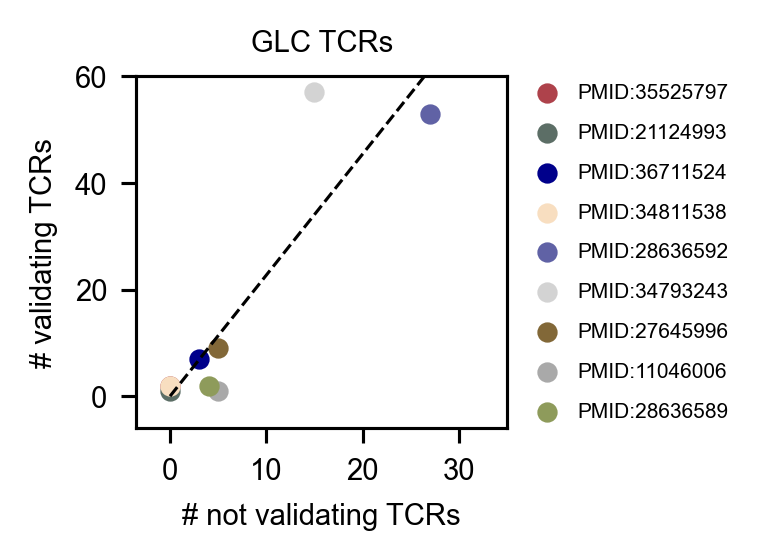

In [85]:
ax,fig,gs = startfig(6.75, 5)

studies = vdjdb_merge_df_glc.loc[:, 'reference.id'].unique()

for study in studies:
    ax.scatter(vdjdb_merge_df_glc.loc[(vdjdb_merge_df_glc.loc[:, 'reference.id'] == study) & (vdjdb_merge_df_glc.loc[:, 'padj'] > pval_threshold), :].shape[0],
               vdjdb_merge_df_glc.loc[(vdjdb_merge_df_glc.loc[:, 'reference.id'] == study) & (vdjdb_merge_df_glc.loc[:, 'padj'] < pval_threshold), :].shape[0], label = study, s = 15,
               color = study_color_dict[study],
               )

ax.plot(134/(193-134)*np.arange(0, 35), color = 'black', linestyle = '--', linewidth = 0.75)
ax.legend(fontsize=5, loc='center left', bbox_to_anchor=(1, 0.5),
          handletextpad=0.5, labelspacing=1)
ax.set_ylim(-6, 60)
ax.set_xlim(-3.5, 35)
ax.set_title('GLC TCRs', fontsize = 7)
ax.set_ylabel('# validating TCRs', fontsize =7)
ax.set_xlabel('# not validating TCRs', fontsize = 7)
ax.tick_params(axis='both', labelsize=7)
fig.tight_layout()
fig.savefig('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/sup_fig_3_pdfs/number_glc_tcrs_non_validating_vs_validating_scatter.pdf')

In [27]:
def generate_regions_set_from_ref_fa(reference: Union[str, os.PathLike[str]],
                                     remove_negative_control_regions: bool = False,
                                     negative_control_regions_suffix_str_tuple: tuple = None
                                     ):

    if remove_negative_control_regions:
        regions_set = set()
        with pysam.FastxFile(reference) as fasta_in:
            for entry in fasta_in:
                if entry.name.endswith(negative_control_regions_suffix_str_tuple):
                    continue
                regions_set.add(entry.name)

        return regions_set

    regions_set = set()
    with pysam.FastxFile(reference) as fasta_in:
        for entry in fasta_in:
            regions_set.add(entry.name)

    return regions_set

## Figure S3E map pilot data onto screen data

In [28]:
ref_set = generate_regions_set_from_ref_fa(reference = '/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_tcr_assembly_runs/r3_2023-08-23_any_mers_full_seq_dataset_vdjdb_only/v6/sequencing_quality_analysis/references/stapler_tcr_assembly_nanopore.fa')

In [88]:
'2_16_G10_81_GLCTLVAML' in ref_set

True

In [89]:
len(ref_set)

3693

In [90]:
tcr_refs_df = tcr_refs_df.loc[tcr_refs_df.loc[:, 'name'].isin(ref_set), :].copy()

In [91]:
glc_aurelie_tcr_df = pd.read_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts3_epitope_variants/Selection_tcrs/order_sheets/selected_rows_df_GLCTLVAML_order_fixed_reactivity_result_annotated.xlsx')
glc_aurelie_tcr_df = glc_aurelie_tcr_df.loc[glc_aurelie_tcr_df.loc[:, 'Ambiguous'] == 0, :]

ylq_aurelie_tcr_df = pd.read_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts3_epitope_variants/Selection_tcrs/order_sheets/selected_rows_df_YLQPRTFLL_order_reactivity_result_annotated.xlsx')
ylq_aurelie_tcr_df = ylq_aurelie_tcr_df.loc[ylq_aurelie_tcr_df.loc[:, 'Ambiguous'] == 0, :]

In [92]:
glc_aurelie_tcr_df.loc[:, 'clonotype_aa'] = (glc_aurelie_tcr_df.loc[:, 'TRAV'].str.split('*').str[0] + '_' +
                                             glc_aurelie_tcr_df.loc[:, 'cdr3_alpha_aa'].str.split('*').str[0] + '_' +
                                             glc_aurelie_tcr_df.loc[:, 'TRAJ'].str.split('*').str[0] + '--' +
                                             glc_aurelie_tcr_df.loc[:, 'TRBV'].str.split('*').str[0] + '_' +
                                             glc_aurelie_tcr_df.loc[:, 'cdr3_beta_aa'].str.split('*').str[0] + '_' +
                                             glc_aurelie_tcr_df.loc[:, 'TRBJ'].str.split('*').str[0]
                                             )

ylq_aurelie_tcr_df.loc[:, 'clonotype_aa'] = (ylq_aurelie_tcr_df.loc[:, 'TRAV'].str.split('*').str[0] + '_' +
                                             ylq_aurelie_tcr_df.loc[:, 'cdr3_alpha_aa'].str.split('*').str[0] + '_' +
                                             ylq_aurelie_tcr_df.loc[:, 'TRAJ'].str.split('*').str[0] + '--' +
                                             ylq_aurelie_tcr_df.loc[:, 'TRBV'].str.split('*').str[0] + '_' +
                                             ylq_aurelie_tcr_df.loc[:, 'cdr3_beta_aa'].str.split('*').str[0] + '_' +
                                             ylq_aurelie_tcr_df.loc[:, 'TRBJ'].str.split('*').str[0]
                                             )

In [93]:
glc_aurelie_tcr_refs_merge_df = pd.merge(glc_aurelie_tcr_df, tcr_refs_df, how = 'inner', on = 'clonotype_aa')
ylq_aurelie_tcr_refs_merge_df = pd.merge(ylq_aurelie_tcr_df, tcr_refs_df, how = 'inner', on = 'clonotype_aa')

In [94]:
ylq_pilot_translation_df = ylq_aurelie_tcr_refs_merge_df.loc[:, ['well_x', 'name', 'Reactive']].copy()
ylq_pilot_translation_df.rename({'well_x': 'aurelie_well'}, axis=1, inplace=True)
glc_pilot_translation_df = glc_aurelie_tcr_refs_merge_df.loc[:, ['final_well_fixed', 'name', 'Reactive']].copy()
glc_pilot_translation_df.rename({'final_well_fixed': 'aurelie_well'}, axis=1, inplace=True)

In [95]:
print(ylq_pilot_translation_df.shape[0])
print(glc_pilot_translation_df.shape[0])

49
41


In [99]:
ylq_pilot_translation_df.to_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_1_pdfs/ylq_pilot_result_screen_translation.xlsx', index = False)
glc_pilot_translation_df.to_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/figures/fig_1_pdfs/glc_pilot_result_screen_translation.xlsx', index = False)

## Generate TCRvdb

In [89]:
select_cols_list = ['name', 'clonotype_aa', 'cdr3_alpha_aa', 'cdr3_beta_aa', 'TRAV', 'TRAJ', 'TRBV', 'TRBJ', 'TRBD', 'TRAV_IMGT', 'TRAJ_IMGT', 'TRBV_IMGT', 'TRBD_IMGT', 'TRBJ_IMGT', 'epitope_aa', 'hla_short', 'hla_long', 'data_origin', 'vdjdb_score']

In [90]:
tcrvdb = pd.merge(tcr_refs_df.loc[:, select_cols_list], ylq_deseq2_df, on = 'name', how = 'outer')
tcrvdb = pd.merge(tcrvdb, glc_deseq2_df, on = 'name',  how = 'outer')

In [91]:
def coalesce_columns(df):
    # Find all columns with _x suffix
    x_cols = [col for col in df.columns if col.endswith('_x')]
    
    for x_col in x_cols:
        base_col = x_col[:-2]  # Remove '_x'
        y_col = f"{base_col}_y"
        
        if y_col in df.columns:
            # Combine _x and _y into base column
            df[base_col] = df[x_col].combine_first(df[y_col])
            # Drop both _x and _y
            df.drop(columns=[x_col, y_col], inplace=True)

    return df


In [92]:
tcrvdb = coalesce_columns(tcrvdb)

In [93]:
tcrvdb = tcrvdb.loc[tcrvdb.loc[:, 'name'].isin(ref_set),:]
tcrvdb.reset_index(inplace = True, drop = True)

In [94]:
priority_epitopes = ['YLQPRTFLL', 'GLCTLVAML']

epitope_ranked_list = (
    [e for e in priority_epitopes if e in epitope_ranked_list] +
    [e for e in epitope_ranked_list if e not in priority_epitopes] 
)

epitope_ranked_series = pd.Series(range(len(epitope_ranked_list)), index=epitope_ranked_list)
tcrvdb['epitope_rank'] = tcrvdb['epitope_aa'].map(epitope_ranked_series)
tcrvdb.sort_values('epitope_rank', inplace = True)
tcrvdb.drop('epitope_rank', axis = 1, inplace = True)
tcrvdb.reset_index(inplace = True, drop = True)
tcrvdb.to_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/zenodo/TCRvdb.csv')

In [95]:
ylq_deseq2_df.loc[ylq_deseq2_df.loc[:, 'name'] == '1_5_H3_86_YLQPRTFLL', :]

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
8,1_5_H3_86_YLQPRTFLL,198.217526,-2.653196,0.188261,-13.561965,6.730858e-42,1.636410e-40


In [96]:
glc_deseq2_df.loc[glc_deseq2_df.loc[:, 'name'] == '2_15_F15_158_GLCTLVAML', :]

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
45,2_15_F15_158_GLCTLVAML,10.087968,-0.109733,0.642839,-0.01514,0.98792,1.0


## Generate Supplementary Table 1

In [129]:
stapler_df =  pd.read_csv('/Users/m.messemaker/schumacher_lab Dropbox/schumi/tcr_toolbox/tcr_toolbox_datasets/STAPLER/train/2023-08-23_any_mers_full_seq_dataset_vdjdb_only.csv', low_memory=False)

In [130]:
select_cols_list = ['cdr3_alpha_aa', 'cdr3_beta_aa', 'epitope_aa', 'antigen', 'TRAV',
       'TRAJ', 'TRBV', 'TRBD', 'TRBJ', 'cd4_or_cd8', 'data_origin',
       'single_cell', 'assay', 'mhc', 'hla_short', 'hla_long',
       'mhc_derived_from_hla', 'mhc_b', 'sequence_method', 'clonotype_id',
       'vdjdb_score']

In [131]:
stapler_df = stapler_df.loc[:, select_cols_list]

In [132]:
stapler_df.shape[0]

6307

In [133]:
stapler_df.loc[:, 'clonotype_aa'] = (stapler_df.loc[:, 'TRAV'].str.split('*').str[0] + '_' +
                                   stapler_df.loc[:, 'cdr3_alpha_aa'].str.split('*').str[0] + '_' +
                                   stapler_df.loc[:, 'TRAJ'].str.split('*').str[0] + '--' +
                                   stapler_df.loc[:, 'TRBV'].str.split('*').str[0] + '_' +
                                   stapler_df.loc[:, 'cdr3_beta_aa'].str.split('*').str[0] + '_' +
                                   stapler_df.loc[:, 'TRBJ'].str.split('*').str[0]
                                   )

In [134]:
stapler_df.to_excel('/Users/m.messemaker/schumacher_lab Dropbox/schumi/ts/ts6_STAPLER_TCRs_top-10-epitopes_validation/publication/supplementary_tables/Supplementary_Table_1.xlsx')